# Danish Housing Market

In the following, we present three methods to evaluate the Danish housing market for potential overpricing. These three approaches include: 1) Real house prices vs. trend 2) Price-to-income ratio vs. trend 3) Price-to-rent vs. trend. These approaches are rather straight-forward, but do provide valuable insights to the state of the housing market. 


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

df = pd.read_csv('Data_opg_2.csv')


The following code will provide the first ratio analysis: Real house prices vs. trend.

       year  PRICE_INDEX  Housing taxes, Denmark  Mortgage rate  Gamma  \
0    1996q1       90.613                   0.014          0.086  0.039   
1    1996q2       91.100                   0.014          0.086  0.039   
2    1996q3       91.636                   0.013          0.085  0.038   
3    1996q4       92.350                   0.013          0.081  0.035   
4    1997q1       92.363                   0.013          0.078  0.035   
..      ...          ...                     ...            ...    ...   
97   2020q2      131.072                   0.010          0.011  0.015   
98   2020q3      131.904                   0.009          0.010  0.009   
99   2020q4      131.103                   0.009          0.010  0.015   
100  2021q1      131.099                   0.009          0.011  0.012   
101  2021q2      133.402                   0.009          0.013  0.001   

     inflation  Income_DK  Income_CPH   Housing_DK  Housing_CPH  \
0        0.019     99.020      88.294  14533

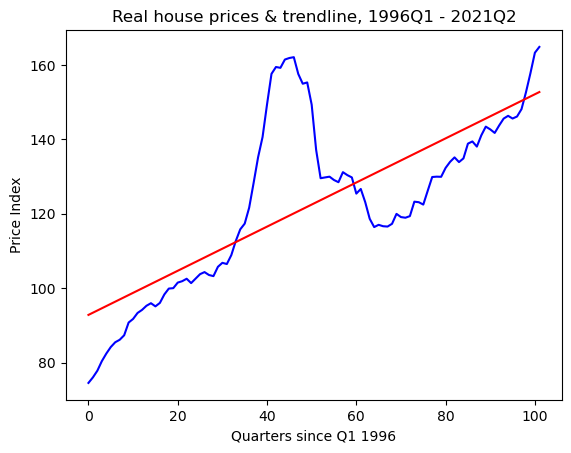

In [55]:

df.drop(columns=["Consumer prices",'Administration margins','Housing taxes, Copenhagen','Administration margins','Rentefradrag','Disposable income, Denmark','Disposable income, Copenhagen','Housing stock, Denmark / 1000','Housing stock CPH / 1000','Flat price, Copenhagen 2006=100','Unnamed: 22','House price, Denmark 2006=100'], inplace=True)
# Here we drop the unnessaary coloumns for our data analysis.
df = df.rename(columns = {"Unnamed: 0":"year","Consumer Price Index: 2000Q4 = 100": "PRICE_INDEX","Inflation Yearly" : "inflation","Real Disposible Income 2000Q4 = 100":"Income_DK", "Real Disposible Income Copenhagen 2000Q4 = 100": "Income_CPH","Housing stock, Denmark":"Housing_DK","Housing stock, Copenhagen":"Housing_CPH","Real House Price Denmark 2000Q4 = 100":"House Price_DK","Real Flat Price Copenhagen 2000Q4 = 100":"Flat Price_CPH"})
# Here we rename the reaminiing columns to clariy their meaning.
print(df)
#Here we print our remaning data to verify we have dropped and renamed everything.
from scipy.stats import linregress

# Here we create scatter plot of prices
plt.plot(df.index, df['House Price_DK'], linestyle='-', color='blue')

# Here we calculate trendline using linear regression
slope, intercept, r_value, p_value, std_err = linregress(df.index, df['House Price_DK'])
trendline = slope * df.index + intercept

# Here we add trendline to plot
plt.plot(df.index, trendline, color='red')

# Here we add labels and title
plt.xlabel('Quarters since Q1 1996')
plt.ylabel('Price Index')
plt.title('Real house prices & trendline, 1996Q1 - 2021Q2')

# Here we show our plot
plt.show()



Real house prices were 8% above the long-term trend in 2021Q2, the first time since the mid-2000s housing bubble. However, determining the long-term trend in real house prices is limited by the chosen sample period due to structural changes in the housing market, such as deregulations in the credit markets, that affect the trend. The sample period from 1996Q1 to 2021Q2 is relatively short and contains a big housing bubble, which affects the trend. Fundamental factors like higher income and lower interest rates could justify actual house prices moving above trend despite suggesting overvaluation by definition.

The following code will provide the second ratio analysis: Price-to-income ratio vs. trend.

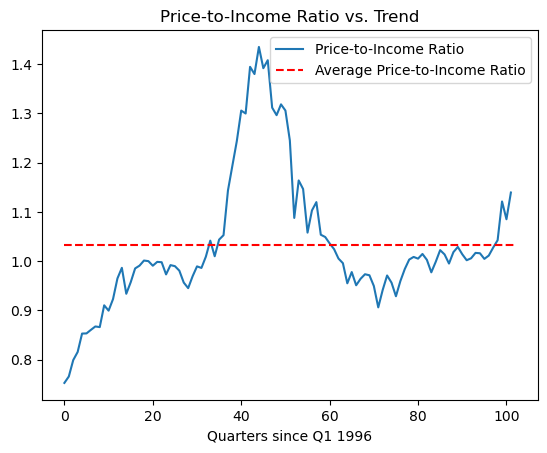

In [56]:


# Here we calculate the ratio of Price_CPH to Income_CPH
df['Price_Income_Ratio'] = df['House Price_DK'] / df['Income_DK']

# Here we calculate the average of Price_Income_Ratio column
avg_price_income_ratio = np.mean(df['Price_Income_Ratio'])

# Here we plot the ratio as a graph with a trendline
plt.plot(df['Price_Income_Ratio'])
plt.plot([0, len(df)], [avg_price_income_ratio, avg_price_income_ratio], 'r--')
plt.xlabel('Quarters since Q1 1996')
plt.title('Price-to-Income Ratio vs. Trend')
plt.legend(['Price-to-Income Ratio', 'Average Price-to-Income Ratio'], loc='best')
plt.show()




From 2020Q3 to 2021Q2, the ratio trended above the sample period average. However, the sample period contains the mid-2000s housing bubble, which influences the sample period average. Evaluating the rate of increase in the two variables shows that real house prices rose by 4% a year on average from 2015Q3 to 2021Q2, while real disposable income only rose 1.9% a year on average. This suggests a growing disconnect between the two variables. An increasing price-to-income ratio implies overvaluation, but it may also result from a shift in consumer preferences towards housing, rather than overvaluation.


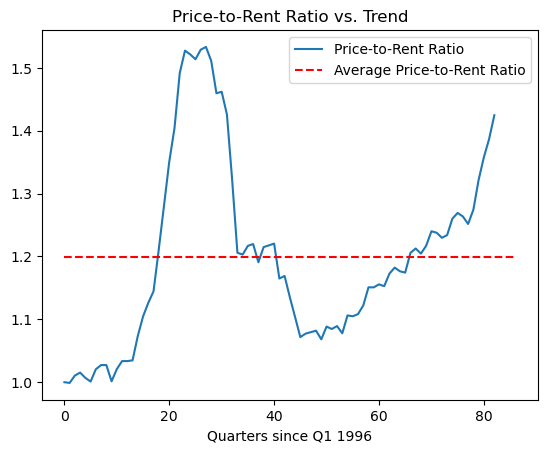

In [57]:
ff = pd.read_csv('Pricerent.csv')

#Here we open another dataset containing house price and rent levels for Denmark since 1996.

ff['Real house price to real rent'] = ff['index real houseprices'] / ff['indeks real husleje']
#Here we define our ratio Real house prices to real rent levels.

avg_real_house_to_rent_ratio = np.mean(ff['Real house price to real rent'])
# Here we define an average of the ratio.

plt.plot(ff['Real house price to real rent'])
plt.plot([0, len(ff)], [avg_real_house_to_rent_ratio, avg_real_house_to_rent_ratio], 'r--')
plt.xlabel('Quarters since Q1 1996')
plt.title('Price-to-Rent Ratio vs. Trend')
plt.legend(['Price-to-Rent Ratio', 'Average Price-to-Rent Ratio'], loc='best')
plt.show()




The price-to-rent ratio assumes a stable relationship between housing prices and rents in an equilibrium market. A decreasing ratio suggests owner-occupied housing is more attractive, while an increasing ratio indicates overvaluation and a possible housing bubble. As of 2021Q2 the price-to-rent ratio is 19% above its trendline, indicating owner-occupied housing have grown increasingly disconnected from the rental housing market. 
However, the Danish housing market's rent control regulations and market friction make this approach inadequate. The housing market is heterogeneous, segmented, and characterized by high transaction costs, so relying solely on the price-to-rent ratio is insufficient, thus it is imperative that the two previous ratios are evaluated in a combination with this. 

Conclusion:
Based on these three simple, yet popular approaches, our analysis suggests that the Danish housing market was slightly overvalued as of 2021Q2.